#Project Description

---


##Introduction:


---



Nowadays, more emphasis and research is given on the ability of a person's character. For example, in the IT field, behavioral assessment will be a required filter incase of emergencies and stressful situations, how stable or balanced he can keep himself. Hence, it is very important to keep track of a person's conditions and on which aspects he has to work and focus on is definitely needed. 

**This prediction model's main aim is to concentrate on the features that a person is lacking on an average on his complete behavior and to make him balanced.**


---


##Abstract:


---


We have researched, designed and developed an application for personality prediction which will play a pivotal role in developing one's behavior. Personality prediction ensures different types of behaviors are categorized into 5 base types and predicts a score for each category that compares with the mean of each category and suggests the perfect areas to be worked to make him balanced.

We have picked a finest regression and ML algorithms that gives the best accuracy of 99% after downsampling and upsampling the data after iterating multiple times in the muller loop


---


##Approach:


---


Everytime to find a solution we have to divide a problem in its simplest possible ways. We completely approached this problem in agile completely for any simple step that we have divided from categories and defining golden clusters and extracting features out of it. There is a lot of brainstorming and implementing many possible solutions differently and picking the best possible one out of it to integrate it with our project.


---

##Questions:

---


●	What is the importance of behavioral assessments?
●	Why are people leaving industries and what is their after life?
●	What are the challenges that we will be facing technically?
●	What sort of output makes it more clean, understandable and effective?
●	What algorithms are required and what changes to be made accordingly?
Experiments:
●	Researched on several behaviors and what made them to struggle
●	Made some bases on algorithms and experimented with various features
●	Added some miscellaneous features, after trails getting failed dropped them off
●	Contributed heavily to research on dataset
Team name and members:


---


##Team Dragonites


---


**Team Members** | **Roles**
--- | ---
**Khushil Modi (015923115)** | **Cleaning, Dimensionality Reduction, GMM, Fractal, Iteration - 1, SMOTE, upsampling**
**Nevil Shah (015964975**) |	**Categorizing, KMeans, DBScan, Fractal, Iteration - 2, labeling/rating, classification, downsampling**
**Vishnu Yeruva (015917551**) |	**Data & Amalgamation, Silhouette, Birch, Fractal, Iteration - 3, Latent Features, Interactive Slider, muller loop**


# Install Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kmeans-pytorch

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch
from kmeans_pytorch import kmeans, kmeans_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

##Data
Gone for most preferable and reliable sources - KAGGLE

###Data Set 1

It is a five-factor model (FFM) which is a taxonomy, or grouping, for personality traits. When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person.

###Data set 2
This helps in 5-point Likert scale. (1: Strongly Disagree, 5: Strongly Agree). Based on assigned metric and on this assigned condition will be derived a condition which is oddly imbalance.

###Data Set 3
This is amalgamation of Data Set 1, 2 & 3(which we scrapped from https://www.personalitycafe.com/forums/myers-briggs-forum.49/)


# Data Loading

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Team Dragonites/Datasets/5 Big Personality Dataset/data-final.csv', sep='\t') #Dataset from drive
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

# Data Cleaning

In [ ]:
data.isna().sum()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
EXT6       1783
EXT7       1783
EXT8       1783
EXT9       1783
EXT10      1783
EST1       1783
EST2       1783
EST3       1783
EST4       1783
EST5       1783
EST6       1783
EST7       1783
EST8       1783
EST9       1783
EST10      1783
AGR1       1783
AGR2       1783
AGR3       1783
AGR4       1783
AGR5       1783
AGR6       1783
AGR7       1783
AGR8       1783
AGR9       1783
AGR10      1783
CSN1       1783
CSN2       1783
CSN3       1783
CSN4       1783
CSN5       1783
CSN6       1783
CSN7       1783
CSN8       1783
CSN9       1783
CSN10      1783
OPN1       1783
OPN2       1783
OPN3       1783
OPN4       1783
OPN5       1783
OPN6       1783
OPN7       1783
OPN8       1783
OPN9       1783
OPN10      1783
country      77
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
country    0
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(1009391, 51)

#Data Visualization

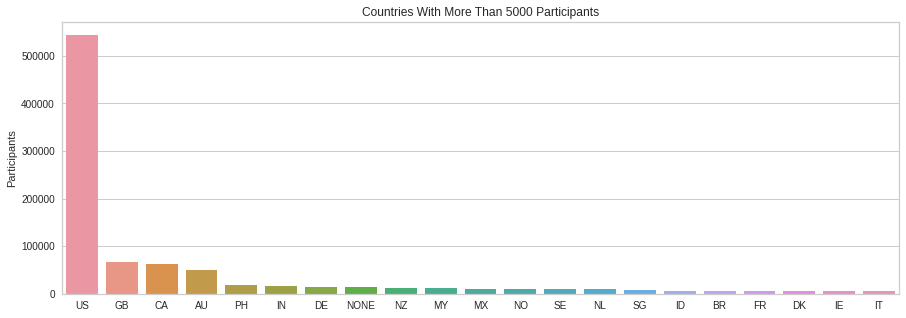

In [ ]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

Q&As Related to Extroversion Personality


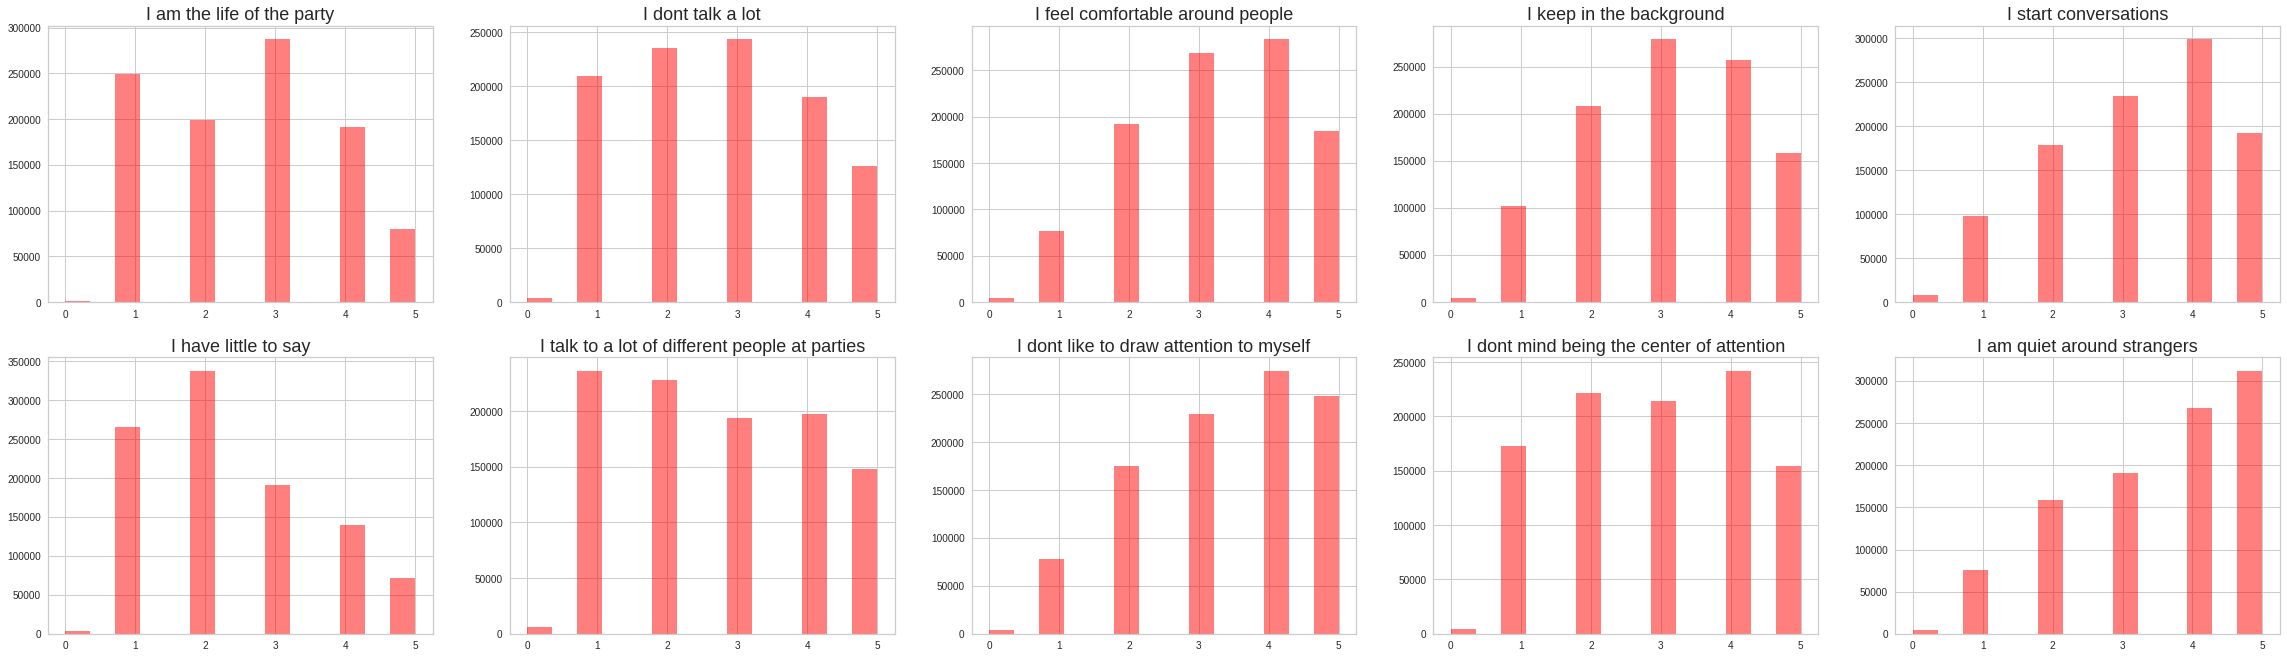

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Neuroticism Personality


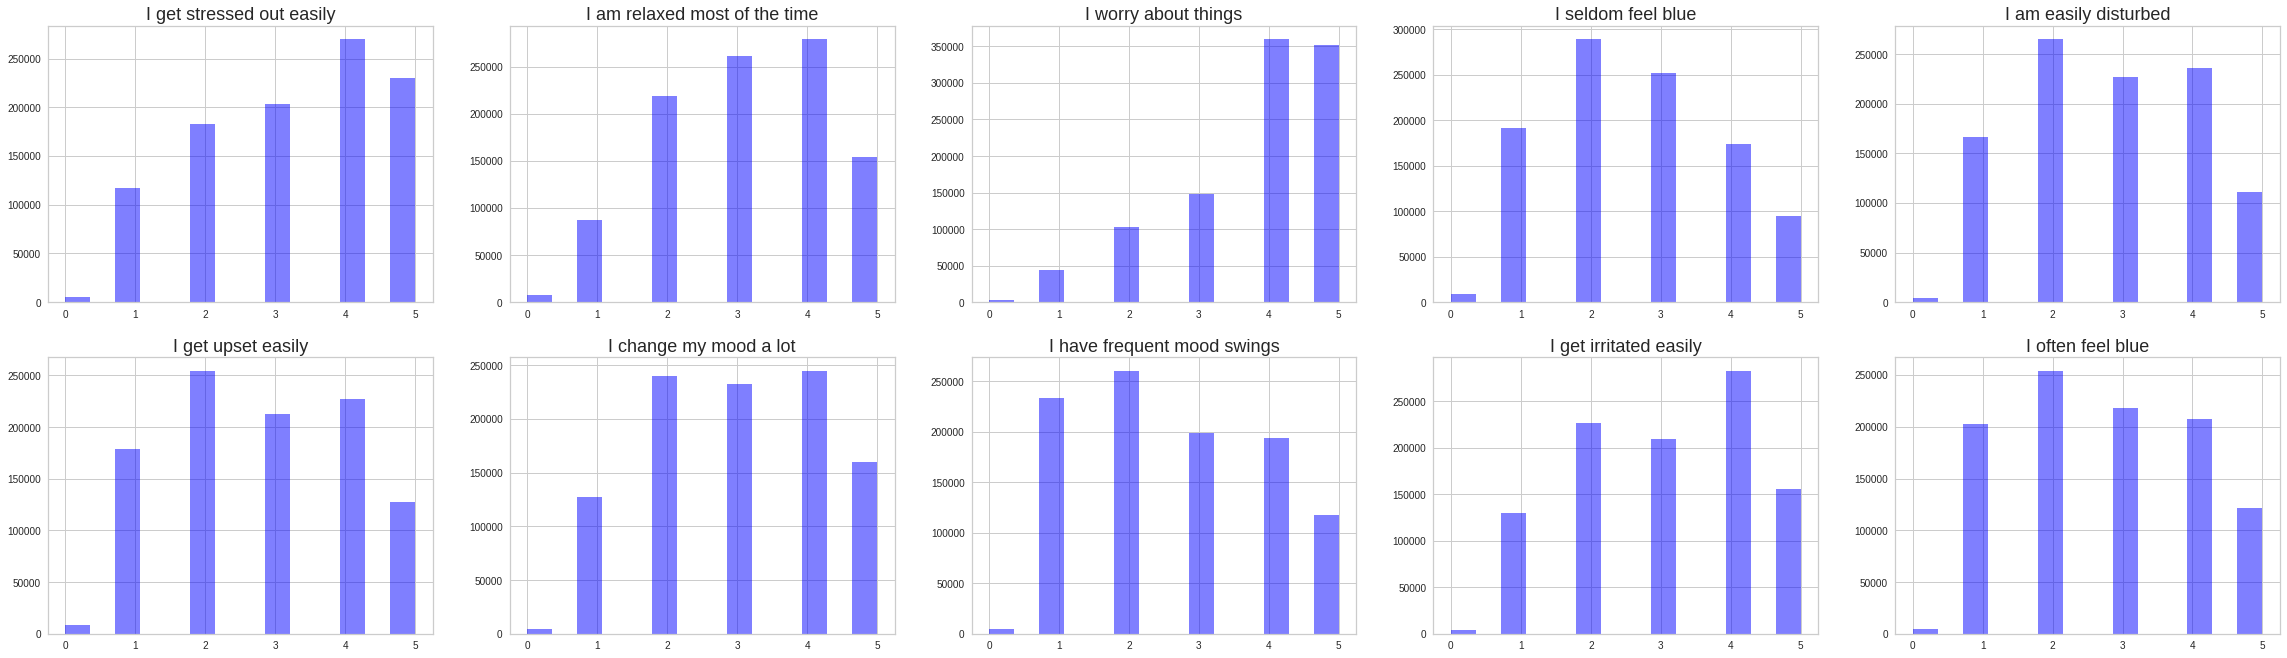

In [ ]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'blue')

Q&As Related to Agreeable Personality


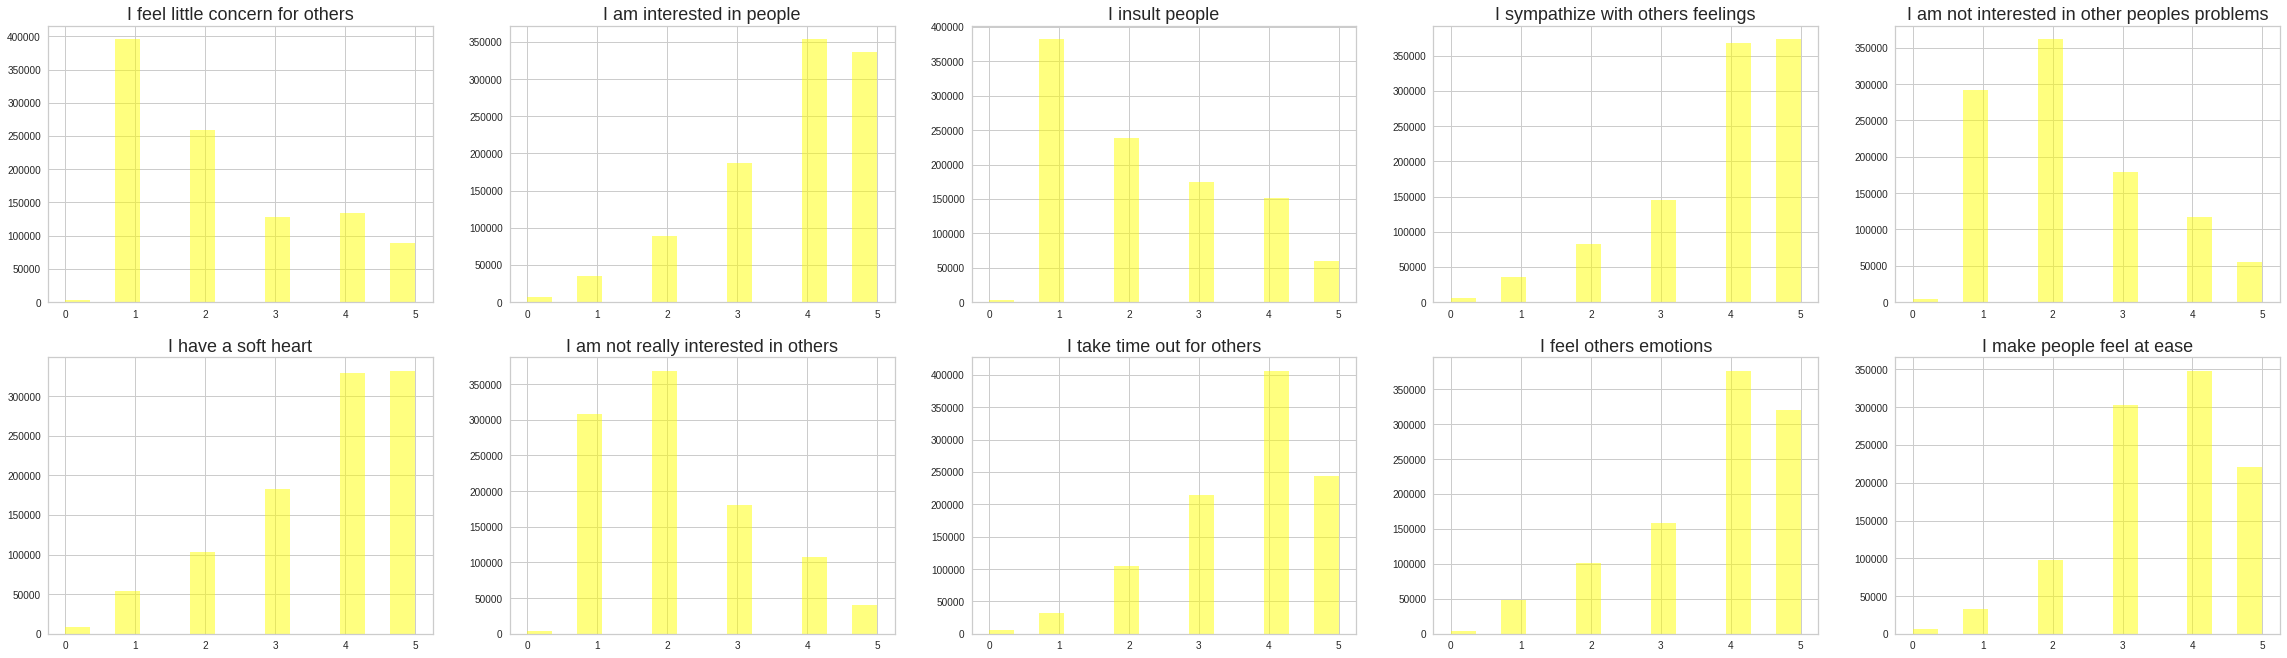

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'yellow')

Q&As Related to Conscientious Personality


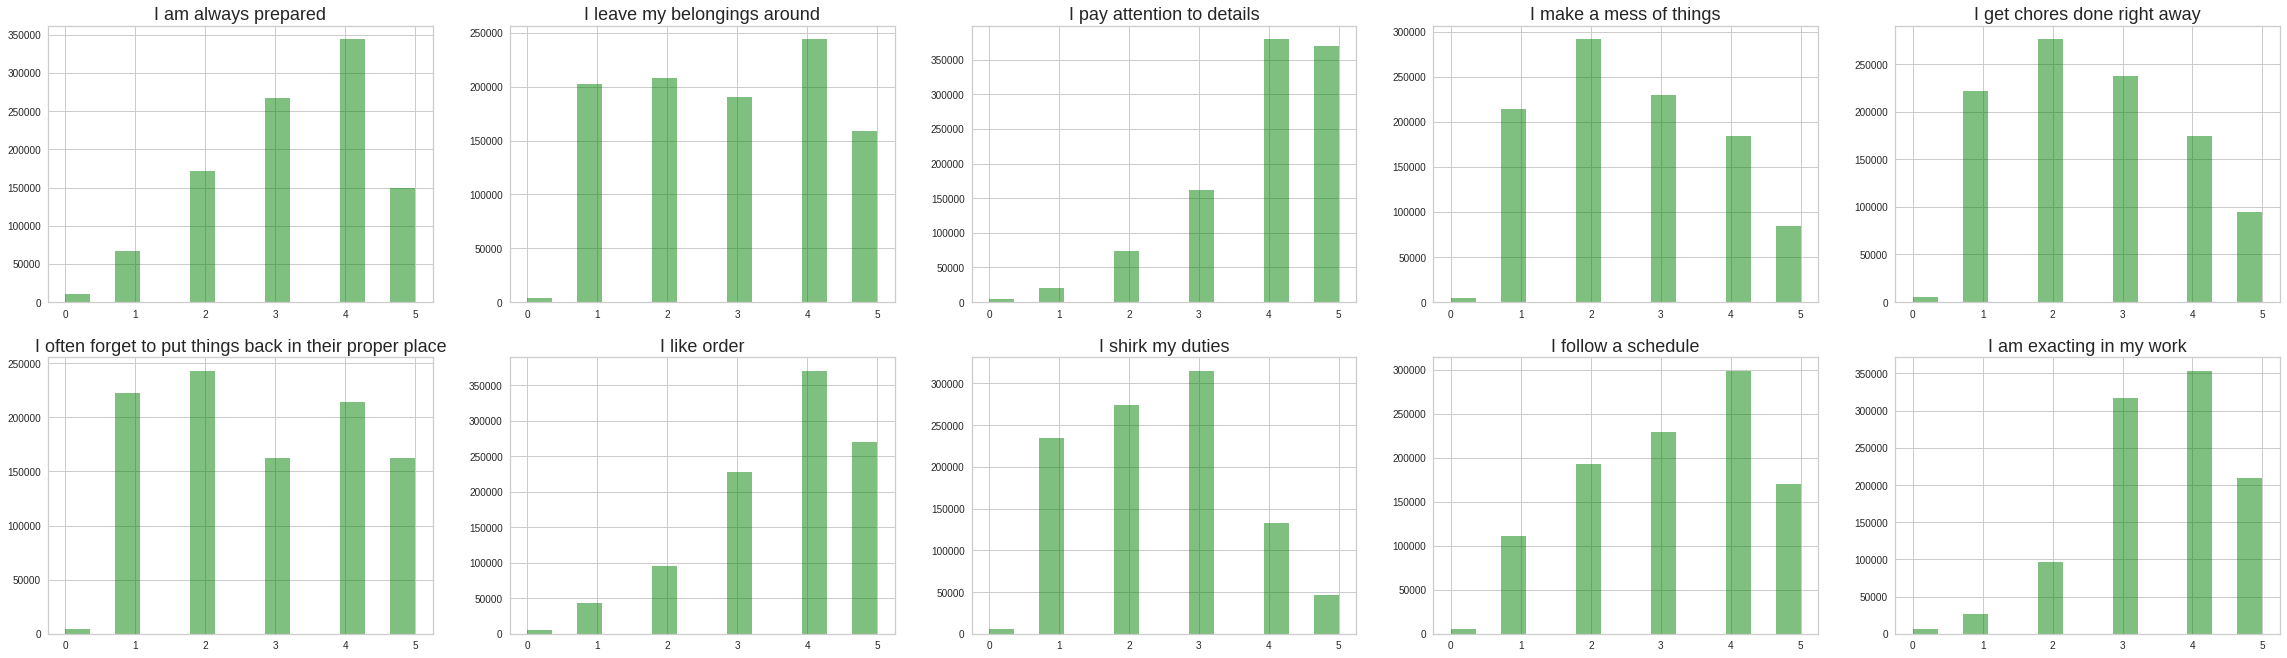

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'green')

Q&As Related to Open Personality


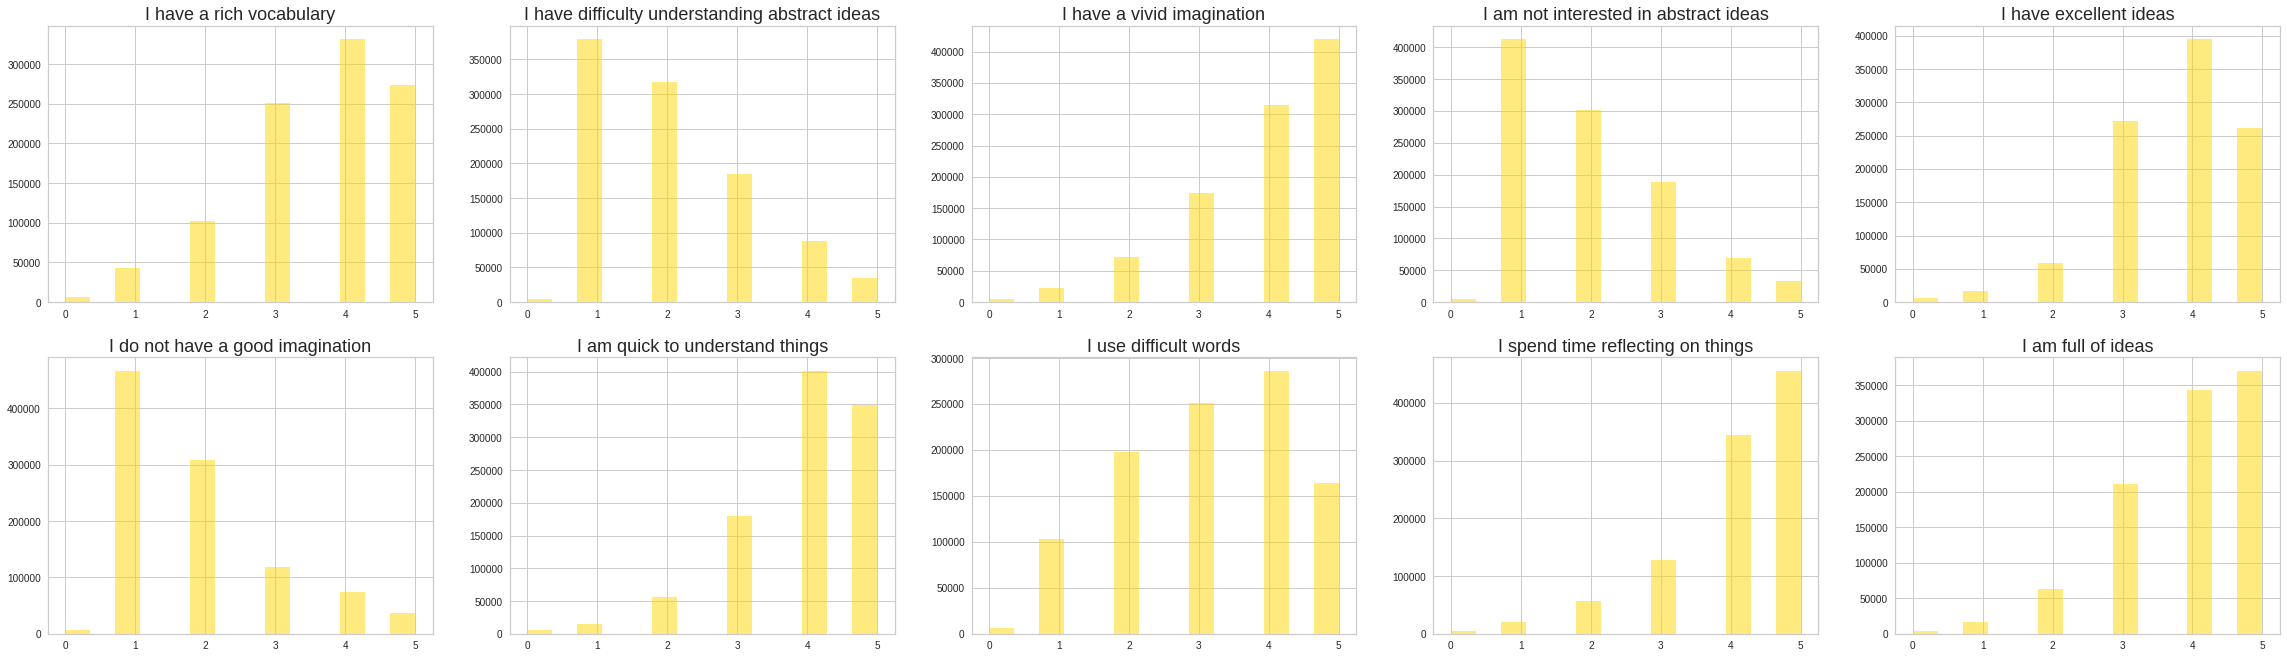

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'gold')

In [ ]:
data1 = data.drop('country', axis=1)

In [ ]:
data1.shape

(1009391, 50)

#PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(data1)
X_scaled = scaler.transform(data1)

In [ ]:
pca_2 = PCA(n_components = 5)
data_embeddings_pca_2 = pca_2.fit_transform(X_scaled)

# KMeans using Scikit Learn

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

data = data.drop('country', axis=1)
columns = list(data.columns)

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
data_sample = data[:5000]

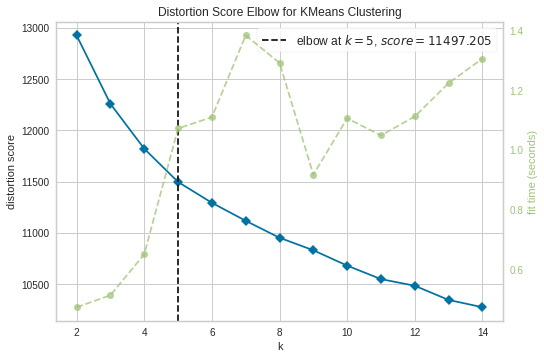

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(data_sample)
visualizer.poof()

In [ ]:
kme = KMeans(n_clusters=5).fit(data1)
kme.labels_

array([4, 0, 0, ..., 2, 0, 2], dtype=int32)

In [ ]:
y_kmeans = km.fit_predict(data1)

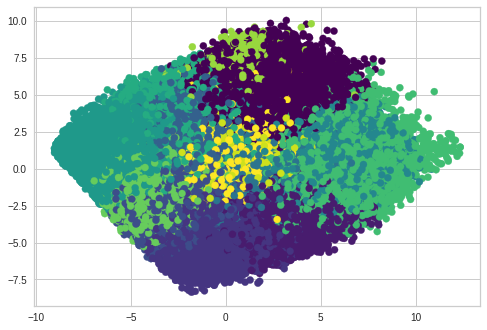

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=y_kmeans, s=50, cmap='viridis')

# KMeans Using PyTorch

In [ ]:
# data
data_size, dims, num_clusters = 100000, 2, 5
x = torch.from_numpy(data1.to_numpy())

In [ ]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=5, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 72it [01:53,  1.58s/it, center_shift=0.000093, iteration=72, tol=0.000100]


In [ ]:
cluster_ids_x

tensor([0, 4, 4,  ..., 2, 4, 2])

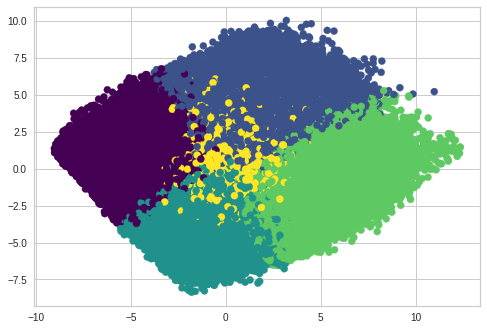

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=cluster_ids_x, s=50, cmap='viridis')

#Week-2

#Gausian Mixture Model Custering using Scikit Learn

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(data1)
y_gmm = gmm.fit_predict(data1)
y_gmm

array([1, 2, 1, ..., 1, 3, 1])

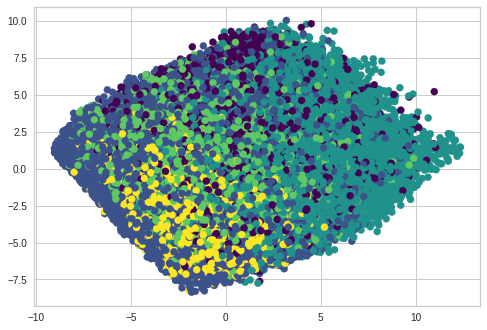

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=y_gmm, s=50, cmap='viridis')

#K-Means with 5000 Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(data_sample)
X_scaled1 = scaler.transform(data_sample)

In [ ]:
pca_3 = PCA(n_components = 5)
data_embeddings_pca_3 = pca_3.fit_transform(X_scaled1)

In [ ]:
mk = KMeans(n_clusters=5).fit(data_sample)
mk.labels_

array([2, 3, 3, ..., 2, 4, 2], dtype=int32)

In [ ]:
mk.cluster_centers_

array([[0.47688098, 0.63283174, 0.59015048, 0.66730506, 0.54391245,
        0.54883721, 0.45718194, 0.68399453, 0.57701778, 0.75075239,
        0.48399453, 0.7502052 , 0.59671683, 0.61094391, 0.47852257,
        0.40109439, 0.47715458, 0.40410397, 0.52120383, 0.45307798,
        0.62380301, 0.61805746, 0.55157319, 0.55321477, 0.64213406,
        0.51135431, 0.59890561, 0.57072503, 0.52585499, 0.62134063,
        0.6380301 , 0.57619699, 0.74528044, 0.49822161, 0.46648427,
        0.55157319, 0.68919289, 0.524487  , 0.55294118, 0.67742818,
        0.73023256, 0.40848153, 0.72886457, 0.44213406, 0.74008208,
        0.42352941, 0.80300958, 0.63173735, 0.73597811, 0.74856361],
       [0.66752577, 0.38814433, 0.75309278, 0.50446735, 0.80962199,
        0.37285223, 0.71254296, 0.56460481, 0.73487973, 0.60979381,
        0.75876289, 0.58745704, 0.85773196, 0.47353952, 0.65910653,
        0.69845361, 0.75738832, 0.69828179, 0.73402062, 0.64931271,
        0.41151203, 0.85412371, 0.54037801, 0.8

In [ ]:
centers = np.array(mk.cluster_centers_)

In [ ]:
y_mk = km.fit_predict(data_sample)

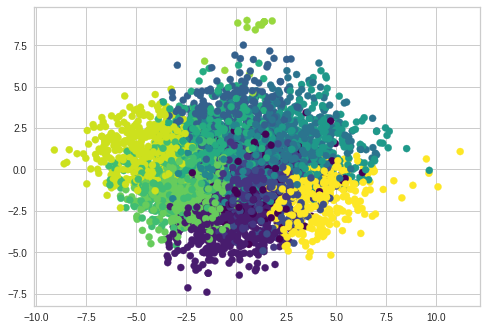

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_mk, s=50, cmap='viridis')

# Cluster with GMM & DBSCAN

In [ ]:
from sklearn.mixture import GaussianMixture
gmm1 = GaussianMixture(n_components=5).fit(data_sample)
y_gmm1 = gmm1.fit_predict(data_sample)
y_gmm1

array([4, 0, 4, ..., 1, 1, 4])

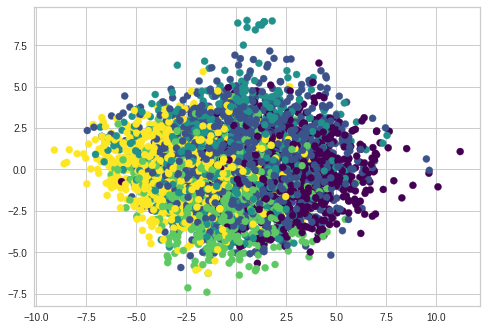

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_gmm1, s=50, cmap='viridis')

# BIRCH Clustering

In [ ]:
from sklearn.cluster import Birch

In [ ]:
bir = Birch(n_clusters=5).fit(data_sample)
bir.labels_

array([1, 1, 0, ..., 1, 4, 1])

In [ ]:
y_bir = bir.fit_predict(data_sample)
y_bir

array([1, 1, 0, ..., 1, 4, 1])

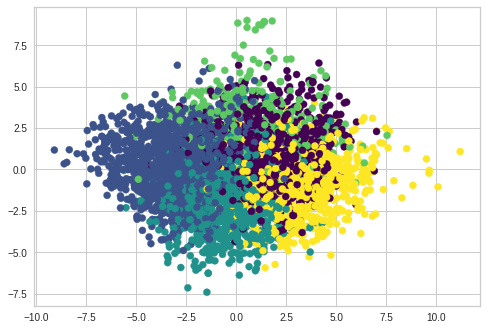

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_bir, s=50, cmap='viridis')

#Comparing K-means, GMM and Birch

1) The Gausian Mixture is more robust, but seems to be slower than K-Means and Birch as it takes more iterations to the EM algorithm to reach convergence.

2) The GM sometimes converge to a local minima which is not a optimal solution

3) The time required for Birch in this example is the least following by K-Means and lastly GMM.

4) If we use a GMM followed by K-Means the results become better exponentially.

In [ ]:
# Creating the "Extrovision"  personality column  (Average of all the questions)
extroversion = (data['EXT1'] + data['EXT2'] + data['EXT3'] + data['EXT4'] + data['EXT5'] + data['EXT6'] + data['EXT7'] + data['EXT8'] + data['EXT9'] + data['EXT10'])/10
data['Extroversion'] = extroversion

# Creating the "Neuroticism" personality column  (Average of all the questions)
neuroticism = (data['EST1'] + data['EST2'] + data['EST3'] + data['EST4'] + data['EST5'] + data['EST6'] + data['EST7'] + data['EST6'] + data['EST9'] + data['EST10'])/10
data['neuroticism'] = neuroticism

# Creating the "Agreeable" personality column  (Average of all the questions)
agreeable = (data['AGR1'] + data['AGR2'] + data['AGR3'] + data['AGR4'] + data['AGR5'] + data['AGR6'] + data['AGR7'] + data['AGR8'] + data['AGR9'] + data['AGR10'])/10
data['agreeable'] = agreeable

# Creating the "Conscientious" personality column  (Average of all the questions)
conscientious= (data['CSN1'] + data['CSN2'] + data['CSN3'] + data['CSN4'] + data['CSN5'] + data['CSN6'] + data['CSN7'] + data['CSN8'] + data['CSN9'] + data['CSN10'])/10
data['conscientious'] = conscientious

# Creating the "open" personality column  (Average of all the questions)
open = (data['OPN1'] + data['OPN2'] + data['OPN3'] + data['OPN4'] + data['OPN5'] + data['OPN6'] + data['OPN7'] + data['OPN8'] + data['OPN9'] + data['OPN10'])/10
data['open'] = open

data = data.drop(data.loc[:, 'EXT1':'OPN10'].columns, axis=1)
data.head()

,Extroversion,neuroticism,agreeable,conscientious,open
0,0.60,0.48,0.62,0.64,0.66
1,0.68,0.42,0.64,0.62,0.54
2,0.58,0.52,0.56,0.56,0.62
3,0.52,0.54,0.64,0.54,0.62
4,0.70,0.46,0.60,0.64,0.72


In [ ]:
data1 = data
Personality = (data1['Extroversion'] + data1['conscientious'] + data1['neuroticism'] + data1['agreeable'] + data1['open'])
data1['Personality'] = Personality
data1 = pd.DataFrame(data1)
data1.shape

(1009391, 6)

In [ ]:
a = data1['Personality'].tolist()
b = [0] * len(a)
for i in range(0,1009391):
  if a[i]<12.0:
    b[i]= "Bad" 
  elif a[i]>=12.0 and a[i]<17.0 :
    b[i] = "Medium" 
  else:
    b[i]= "Good"

data1.head()

,Extroversion,neuroticism,agreeable,conscientious,open,Personality
0,0.60,0.48,0.62,0.64,0.66,3.00
1,0.68,0.42,0.64,0.62,0.54,2.90
2,0.58,0.52,0.56,0.56,0.62,2.84
3,0.52,0.54,0.64,0.54,0.62,2.86
4,0.70,0.46,0.60,0.64,0.72,3.12


In [ ]:
d = pd.DataFrame(b)
d

,0
0,Bad
1,Bad
2,Bad
3,Bad
4,Bad
...,...
1009386,Bad
1009387,Bad
1009388,Bad
1009389,Bad


In [ ]:
data1 = pd.concat([data1, d], axis=1, join='inner')
data1

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,0
0,0.60,0.48,0.62,0.64,0.66,3.00,Bad
1,0.68,0.42,0.64,0.62,0.54,2.90,Bad
2,0.58,0.52,0.56,0.56,0.62,2.84,Bad
3,0.52,0.54,0.64,0.54,0.62,2.86,Bad
4,0.70,0.46,0.60,0.64,0.72,3.12,Bad
...,...,...,...,...,...,...,...
1009386,0.64,0.66,0.72,0.62,0.58,3.22,Bad
1009387,0.68,0.82,0.66,0.56,0.66,3.38,Bad
1009388,0.66,0.54,0.70,0.66,0.72,3.28,Bad
1009389,0.56,0.70,0.62,0.60,0.70,3.18,Bad


In [ ]:
data1.set_axis([*data1.columns[:-1], 'Test'], axis=1, inplace=True)

In [ ]:
data1.dropna()
data1.drop_duplicates()
data1.shape

(1009391, 7)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data1['Test'])

data1['Test'] = le.transform(data1['Test'])
data1

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test
0,0.60,0.48,0.62,0.64,0.66,3.00,0
1,0.68,0.42,0.64,0.62,0.54,2.90,0
2,0.58,0.52,0.56,0.56,0.62,2.84,0
3,0.52,0.54,0.64,0.54,0.62,2.86,0
4,0.70,0.46,0.60,0.64,0.72,3.12,0
...,...,...,...,...,...,...,...
1009386,0.64,0.66,0.72,0.62,0.58,3.22,0
1009387,0.68,0.82,0.66,0.56,0.66,3.38,0
1009388,0.66,0.54,0.70,0.66,0.72,3.28,0
1009389,0.56,0.70,0.62,0.60,0.70,3.18,0


In [ ]:
data1['Test'].value_counts()

0    1009391
Name: Test, dtype: int64

#Week-3

##Fractal Clustering

After looking at the performance of various clusters using K-Means, performance is evaluated within cluster SSE and silhouette score by using robust scaling so that centering and scaling are therefore not influenced by a small number of very large marginal outliers as they are based on percentiles. After that applied K-Means clustering with the optimal number of clusters defined.

In [ ]:
df = data1[:8000]
df['Test'].value_counts()

0    8000
Name: Test, dtype: int64

In [ ]:
# Function to generate silhoutte score and SSE aas a metric to determine ideal number of cluster 
def plot_cluster(df, max_loop= 20):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X) #apply k-means
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    # Generating the images 
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:
# we will use the robust method to scale the data and thereafter, we will apply kmeans clustering 
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data1.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    # calculating the silhoutte score and sse values 
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return df
# plt.scatter(data_embeddings_pca[:, 0], data_embeddings_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

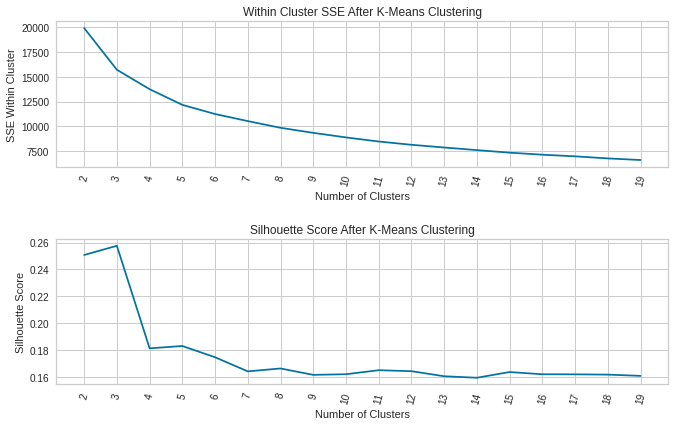

In [ ]:
plot_cluster(df)

In [ ]:
firsttrail = apply_cluster(df, clusters = 3)

clustering performance
-----------------------------------
silhouette score: 0.26
sse withing cluster: 15730


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
firsttrail

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,0.60,0.48,0.62,0.64,0.66,3.00,0,1
1,0.68,0.42,0.64,0.62,0.54,2.90,0,1
2,0.58,0.52,0.56,0.56,0.62,2.84,0,1
3,0.52,0.54,0.64,0.54,0.62,2.86,0,1
4,0.70,0.46,0.60,0.64,0.72,3.12,0,1
...,...,...,...,...,...,...,...,...
7995,0.70,0.78,0.76,0.56,0.62,3.42,0,0
7996,0.62,0.78,0.64,0.60,0.66,3.30,0,0
7997,0.68,0.72,0.60,0.66,0.66,3.32,0,0
7998,0.58,0.50,0.58,0.62,0.60,2.88,0,1


In [ ]:
cluster_per = (firsttrail.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(firsttrail.cluster)

cluster_per['ClusterCount'] = count
cluster_per

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,0.622239,0.687840,0.663280,0.669158,0.684729,3671
1,1,0.598406,0.551025,0.608162,0.586921,0.624318,4303
2,2,0.109231,0.064615,0.091538,0.073846,0.070000,26


In [ ]:
df2_sub = df.query("cluster == 0").reset_index(drop = True)
df2_sub

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,0.70,0.60,0.66,0.58,0.74,3.28,0,0
1,0.62,0.68,0.58,0.64,0.76,3.28,0,0
2,0.72,0.76,0.82,0.88,0.70,3.88,0,0
3,0.56,0.76,0.76,0.66,0.84,3.58,0,0
4,0.66,0.72,0.80,0.70,0.72,3.60,0,0
...,...,...,...,...,...,...,...,...
3666,0.60,0.76,0.58,0.60,0.72,3.26,0,0
3667,0.54,0.72,0.78,0.70,0.68,3.42,0,0
3668,0.70,0.78,0.76,0.56,0.62,3.42,0,0
3669,0.62,0.78,0.64,0.60,0.66,3.30,0,0


###Second Clustering

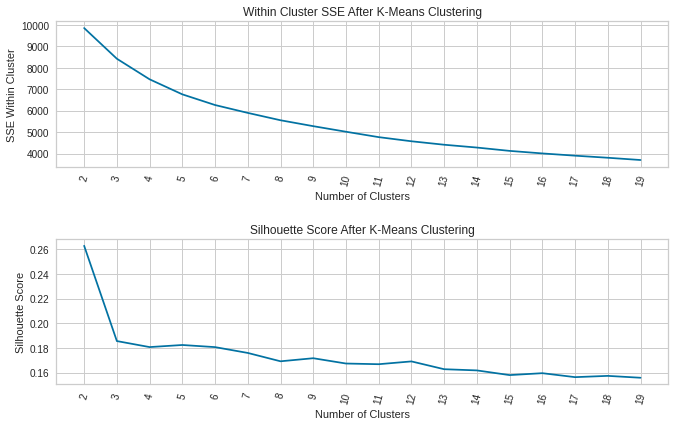

In [ ]:
plot_cluster(df2_sub, max_loop=20)

In [ ]:
second_trial= apply_cluster(df2_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.19
sse withing cluster: 8426


In [ ]:
cluster_per1 = (second_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(second_trial.cluster)

cluster_per1['ClusterCount'] = count
cluster_per1

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,0.612252,0.740293,0.644135,0.638015,0.648575,1572
1,1,0.616512,0.583308,0.659027,0.677335,0.707290,1336
2,2,0.652844,0.762805,0.710170,0.719004,0.719712,763


In [ ]:
df2_sub2 = df2_sub.query("cluster == 1").reset_index(drop = True)
df2_sub2            

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,0.70,0.60,0.66,0.58,0.74,3.28,0,1
1,0.62,0.68,0.58,0.64,0.76,3.28,0,1
2,0.60,0.48,0.60,0.74,0.84,3.26,0,1
3,0.72,0.54,0.74,0.60,0.78,3.38,0,1
4,0.64,0.62,0.64,0.60,0.70,3.20,0,1
...,...,...,...,...,...,...,...,...
1331,0.58,0.66,0.64,0.74,0.76,3.38,0,1
1332,0.62,0.46,0.66,0.70,0.68,3.12,0,1
1333,0.66,0.56,0.70,0.70,0.66,3.28,0,1
1334,0.64,0.58,0.70,0.56,0.74,3.22,0,1


###Third Internal Clustering

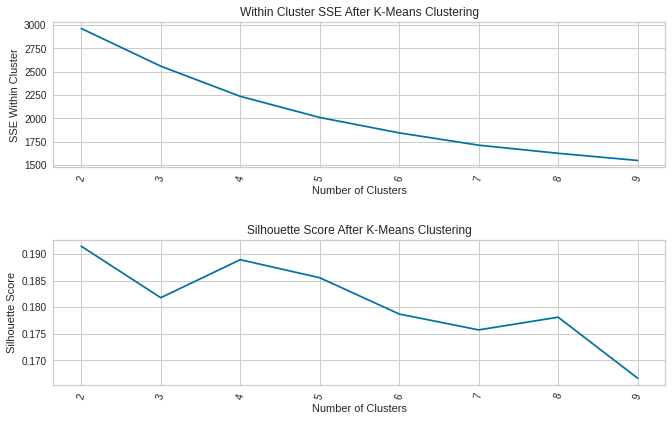

In [ ]:
plot_cluster(df2_sub2, max_loop=10)

In [ ]:
third_trial= apply_cluster(df2_sub2, clusters=9)

clustering performance
-----------------------------------
silhouette score: 0.17
sse withing cluster: 1547


In [ ]:
cluster_per3 = (third_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(third_trial.cluster)

cluster_per3['ClusterCount'] = count
cluster_per3

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,0.617557,0.536641,0.648855,0.740611,0.638473,131
1,1,0.632717,0.637457,0.651214,0.717110,0.687861,173
2,2,0.641282,0.513077,0.688462,0.755641,0.730513,78
3,3,0.579580,0.637063,0.570769,0.681538,0.748951,143
4,4,0.636183,0.556489,0.743053,0.653893,0.651756,131
5,5,0.598947,0.601579,0.628421,0.669895,0.678211,190
6,6,0.626012,0.476074,0.670920,0.672393,0.741595,163
7,7,0.620909,0.639091,0.686104,0.649870,0.757273,154
8,8,0.610405,0.603353,0.668902,0.605896,0.731098,173


Thus this is the number of people with bad personalities in the society and they need to work on themselves to be better human beings. Thus this above is our golden cluster.

##What is the golden cluster?
A.	Getting the better cluster out of a different cluster that is having all the features that every other cluster had.

We have iterated on different trails to achieve as low as possible and preferable silhouette score.


##**Latent Variables and Manifolds**

Q) What are the latent variables you added in and how did that enhance your metrics?

**We summed up the whole values from each person into a ‘personality’ column that helped us in labeling appropriate sets for values.**

We made our project much more understandable and easier by labeling the values in personality into 3 different categories which is used to turn into a ‘Test’ column where we achieved our results on comparing the level of maturity that a person is having for a particular behavior.
	
**We made a mean for each person's scores on their behavior i.e.’Avg_Personality’ column that helped in achieving down_sampling, over_sampling and results finally.**


#Week-4

###Loading Dataset 2

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Datasets/ML-Dataset 2 Top Personality/2018-personality-data.csv")
data2

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [ ]:
data2[' agreeableness'] = round(((data2[' agreeableness']*5)/7),1)
data2[' openness'] = round(((data2[' openness']*5)/7),1)
data2[' emotional_stability'] = round(((data2[' emotional_stability']*5)/7),1)
data2[' conscientiousness'] = round(((data2[' conscientiousness']*5)/7),1)
data2[' extraversion'] = round(((data2[' extraversion']*5)/7),1)
data2

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,3.6,1.4,2.1,1.8,4.6,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,5.0,2.9,4.3,3.9,2.9,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,2.9,2.1,3.2,1.4,1.8,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,3.9,3.9,2.9,3.2,2.9,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,3.9,3.9,2.5,3.2,1.8,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,3.9,2.5,1.8,2.9,3.9,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,2.9,2.5,3.2,2.9,1.8,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,4.3,2.1,3.9,2.5,4.3,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,3.6,2.5,1.1,2.5,1.8,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [ ]:
data2.drop(['userid', ' movie_1', ' movie_2', ' movie_3', ' movie_4', ' movie_5', ' movie_6', ' movie_7',
            ' movie_8', ' movie_9', ' movie_10', ' movie_11', ' movie_12'],axis=1,inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,predicted_rating_1,predicted_rating_2,predicted_rating_3,predicted_rating_4,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12,is_personalized,enjoy_watching
0,3.6,1.4,2.1,1.8,4.6,serendipity,high,4.410466,4.271995,4.611922,4.459407,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847,4,4
1,5.0,2.9,4.3,3.9,2.9,all,default,4.207280,4.266540,4.211322,4.408341,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877,2,3
2,2.9,2.1,3.2,1.4,1.8,serendipity,medium,4.868064,4.710444,5.029360,4.698602,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990,2,2
3,3.9,3.9,2.9,3.2,2.9,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,3,3
4,3.9,3.9,2.5,3.2,1.8,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,2,3


In [ ]:
data2.drop(data2.loc[:, ' assigned metric':' is_personalized'].columns, axis=1, inplace=True)

In [ ]:
data2.drop(' enjoy_watching ',axis=1,inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,3.6,1.4,2.1,1.8,4.6
1,5.0,2.9,4.3,3.9,2.9
2,2.9,2.1,3.2,1.4,1.8
3,3.9,3.9,2.9,3.2,2.9
4,3.9,3.9,2.5,3.2,1.8


In [ ]:
Personality = (data2[' agreeableness'] + data2[' conscientiousness'] + data2[' emotional_stability'] + data2[' extraversion'] + data2[' openness'])
data2['Personality'] = Personality
data2 = pd.DataFrame(data2)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3


In [ ]:
a = data2['Personality'].tolist()
b = [0] * len(a)
for i in range(0,1834):
  if a[i]<12.0:
    b[i]= "Bad" 
  elif a[i]>=12.0 and a[i]<17.0 :
    b[i] = "Medium" 
  else:
    b[i]= "Good"

data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3


##**Classification:**
What metrics are you using ? **[f1, precision recall, etc]**

We computed all the values into 3 discrete sets labeling the behavior on a likert scale of ‘Good’, ‘Bad’, ‘Medium’


In [ ]:
d = pd.DataFrame(b)
d

,0
0,Medium
1,Good
2,Bad
3,Medium
4,Medium
...,...
1829,Medium
1830,Medium
1831,Good
1832,Bad


In [ ]:
data2 = pd.concat([data2, d], axis=1, join='inner')
data2.set_axis([*data2.columns[:-1], 'Test'], axis=1, inplace=True)

In [ ]:
data2.dropna(inplace=True)
data2.drop_duplicates(inplace=True)
data2.shape

(1778, 7)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data2['Test'])
data2['Test'] = le.transform(data2['Test'])

In [ ]:
X = data2.drop(['Test'], axis=1)
y = data2['Test']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

regressors = [
    MLPRegressor(random_state=17, max_iter=150),
    RandomForestRegressor(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsRegressor(n_neighbors=3),
    GradientBoostingRegressor(random_state=17),
    XGBRegressor(),
    SVR(),
    DecisionTreeRegressor(max_depth=3,random_state=17)
]

namesr = ["MLPRegressor", "RandomForestRegressor", "KNeighborsRegressor", "GradientBoostingRegressor",
         "XGBRegressor", "SVR", "DecisionTreeRegressor"]

namesc = ["RandomForestClassifier","KNeighborsClassifier",
          "MLPClassifier","SVC","DecisionTreeClassifier"]

In [ ]:
classifiers = [
    RandomForestClassifier(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=17,learning_rate_init=0.01,max_iter=250),
    SVC(random_state = 17),
    DecisionTreeClassifier(max_depth=3, random_state=17)
]

In [ ]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(namesc, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = RandomForestClassifier, Score (test, accuracy) = 94.76, Training time = 0.02 seconds
Classifier = KNeighborsClassifier, Score (test, accuracy) = 97.94, Training time = 0.02 seconds
Classifier = MLPClassifier, Score (test, accuracy) = 93.45, Training time = 0.49 seconds
Classifier = SVC, Score (test, accuracy) = 95.69, Training time = 0.06 seconds
Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00, Training time = 0.01 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00


#Week-5

In [ ]:
import pickle
max_score = 0.0
Classifier=''
max_class = ''
# iterate over classifiers
for name, clf in zip(namesc, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = RandomForestClassifier, Score (test, accuracy) = 94.76, Training time = 0.03 seconds
Classifier = KNeighborsClassifier, Score (test, accuracy) = 97.94, Training time = 0.02 seconds
Classifier = MLPClassifier, Score (test, accuracy) = 93.45, Training time = 0.49 seconds
Classifier = SVC, Score (test, accuracy) = 95.69, Training time = 0.05 seconds
Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00, Training time = 0.01 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00


#Week-6

##**Discussion on Amalgamation of the Datasets:**

Data Set 1 appropriately provides what we want exactly but to group things near as a cluster we need something which is more organized better in order to improve efficiency for sse shoulder from 91% to 99% we had to move to data2 and data3. Later to extract latent features and manifolds we appended all the researched required columns from 3 data sets to single and added those features to.


Dataset 3 - Amalgamation of Dataset 1, 2 & 3

In [ ]:
data3 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Datasets/Combination of Dataset 1, 2 & 3/file_name.csv", delimiter = '\t')
data3

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2
...,...,...,...,...,...,...,...,...
11829,11829,3.4,3.3,2.5,3.6,3.1,15.9,2
11830,11830,3.0,3.2,2.5,2.9,2.6,14.2,2
11831,11831,3.2,4.1,3.6,3.6,2.8,17.3,1
11832,11832,2.8,3.1,4.0,3.3,3.1,16.3,1


In [ ]:
data3.dropna(inplace=True)
data3.drop_duplicates(inplace=True)
data3.shape

(11834, 8)

In [ ]:
Avg_Personality = data3['Personality']/5
data3['Avg_Personality'] = Avg_Personality
data3.head()

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test,Avg_Personality
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2,2.70
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1,3.80
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0,2.28
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1,3.36
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2,3.06


SMOTE - for imbalanced data

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
X = data3.drop(['Test'], axis=1)
y = data3['Test']

In [ ]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({2: 6922, 1: 4769, 0: 143})


##**Distributions of your Data:**

**EDAV:**

After downsampling and oversampling the representation of features with the ratings at its best compared to average behavior of that person is visualized. From this we can grab the personality on what he can seriously work by comparing every dashboard that has been visualized in the colab


<BarContainer object of 3 artists>

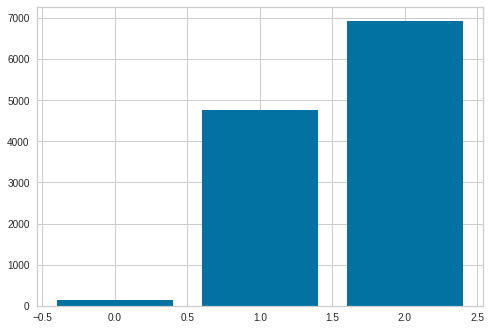

In [ ]:
fig = plt.bar(counter.keys(),counter.values())
fig

##**Selected Features** 

Which features did you select?

●	We have added some miscellaneous features as to what type of movies are being watched by users which is allowed by the 2nd dataset that we can judge one’s behavior on how frequent he is watching a genre.
●	With classification and regression labeled the personality behavior in likert scale.
Algorithms used to select features
And why? [ selected because these algos told me these were the top features!!]

From the start we have been very clear on our idea on how to proceed. But moving forward we have to make some changes on the way to reach the result.

●	So, on the first feature we took an advantage of dataset
●	On the 2nd feature we are clear on the feature to be extracted, so on the way of selecting algorithms we changed the output of our feature into string based into 3 discrete sets


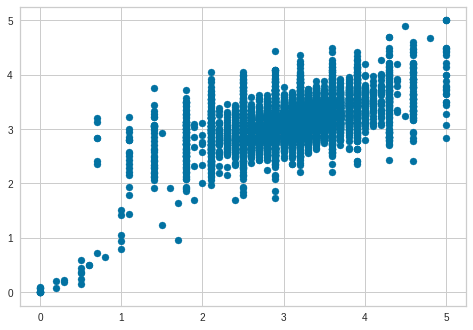

In [ ]:
plt.scatter(data3['agreeableness'],data3['Avg_Personality'])
plt.show() 

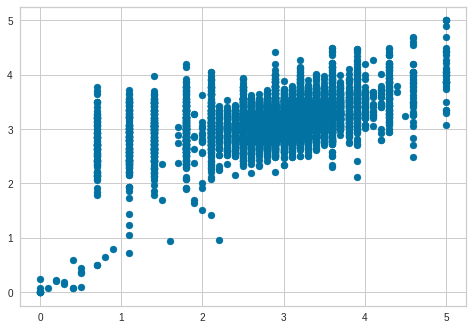

In [ ]:
plt.scatter(data3['extraversion'],data3['Avg_Personality'])
plt.show()

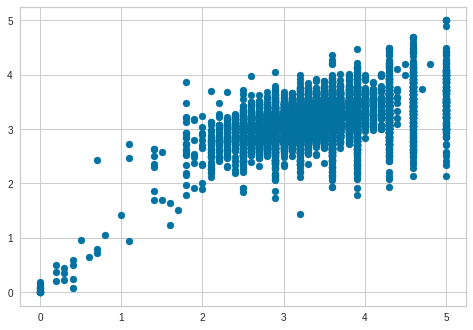

In [ ]:
plt.scatter(data3['openness'],data3['Avg_Personality'])
plt.show()

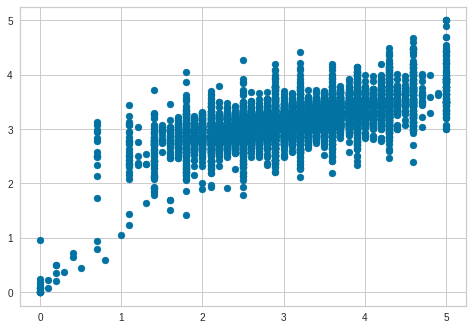

In [ ]:
plt.scatter(data3['neuroticism'],data3['Avg_Personality'])
plt.show()

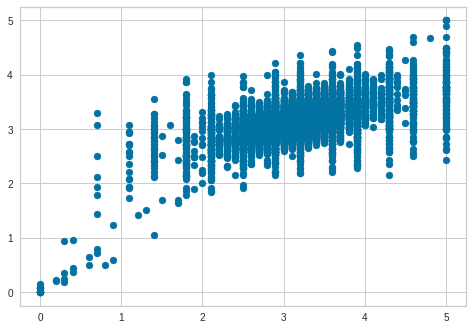

In [ ]:
plt.scatter(data3['conscientiousness'],data3['Avg_Personality'])
plt.show()

In [ ]:
x = counter.keys()
y = data3['Test']

In [ ]:
oversample = SMOTE()

In [ ]:
X1 = X
y1 = y
X1, y1 = oversample.fit_resample(X1, y1)

In [ ]:
counter = Counter(y1)
print(counter)

Counter({2: 6922, 1: 6922, 0: 6922})


In [ ]:
X1.shape

(20766, 8)

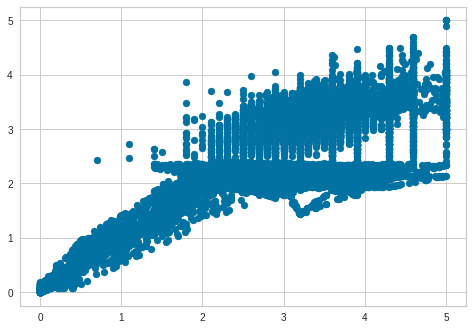

In [ ]:
fig_open = plt.scatter(X1['openness'],X1['Avg_Personality'])
fig_open

In [ ]:
undersample = RandomUnderSampler()

In [ ]:
X2 = X
y2 = y
X2, y2 = undersample.fit_resample(X2, y2)

In [ ]:
counter = Counter(y2)
print(counter)

Counter({0: 143, 1: 143, 2: 143})


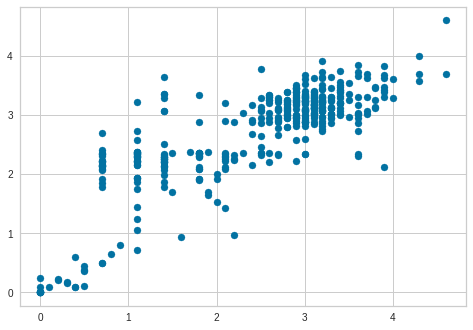

In [ ]:
plt.scatter(X2['extraversion'],X2['Avg_Personality'])
plt.show()

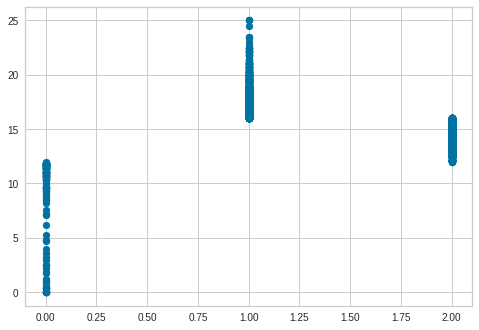

In [ ]:
plt.scatter(data3['Test'],data3['Personality'])
plt.show()

##Changing Data Distributions

What distribution of data will give you a better model?

A.	Barplots

Before sampling the data is very uneven to represent accurately to show the appropriate behavior. We achieved the balanced data to find which category is lacking in rating.


What are the worst and best distributions of your datasets? [Why?]

Before sampling is the worst distribution, because every value is uneven that leads nowhere. Sampling made everything organized and appropriate to compare.


In [ ]:
#Down-Sampling Openness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['openness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'openness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Openness
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['openness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'openness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Extraversion
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['extraversion'], y=X2['Avg_Personality'], animation_frame="Test",size = 'extraversion')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Extraversion
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['extraversion'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'extraversion')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling agreeableness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['agreeableness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'agreeableness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Agreeableness
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['agreeableness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'agreeableness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Neuroticism
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['neuroticism'], y=X2['Avg_Personality'], animation_frame="Test",size = 'neuroticism')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Neuroticism
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['neuroticism'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'neuroticism')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Conscientiusness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['conscientiousness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'conscientiousness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Conscientiousnouss
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['conscientiousness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'conscientiousness')

fig["layout"].pop("updatemenus")
fig.show()

###Muller Loop

In [ ]:
X = data3.drop(['Test'], axis=1)
y = data3['Test']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
classifiers = [
    RandomForestClassifier(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=17,learning_rate_init=0.01,max_iter=250),
    SVC(random_state = 17),
    DecisionTreeClassifier(max_depth=3, random_state=17)
]

In [ ]:
import time
Classifier = ''
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(namesc, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = RandomForestClassifier, Score (test, accuracy) = 98.65, Training time = 0.05 seconds
Classifier = KNeighborsClassifier, Score (test, accuracy) = 63.41, Training time = 0.07 seconds
Classifier = MLPClassifier, Score (test, accuracy) = 77.65, Training time = 4.75 seconds
Classifier = SVC, Score (test, accuracy) = 57.67, Training time = 6.96 seconds
Classifier = DecisionTreeClassifier, Score (test, accuracy) = 99.58, Training time = 0.01 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = DecisionTreeClassifier, Score (test, accuracy) = 99.58


For OverSampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=17)

In [ ]:
import time
Classifier = ''
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(namesc, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = RandomForestClassifier, Score (test, accuracy) = 99.76, Training time = 0.08 seconds
Classifier = KNeighborsClassifier, Score (test, accuracy) = 78.19, Training time = 0.13 seconds
Classifier = MLPClassifier, Score (test, accuracy) = 87.70, Training time = 9.22 seconds
Classifier = SVC, Score (test, accuracy) = 48.19, Training time = 24.04 seconds
Classifier = DecisionTreeClassifier, Score (test, accuracy) = 99.76, Training time = 0.02 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 99.76


For DownSampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=17)

In [ ]:
import time
Classifier = ''
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(namesc, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = RandomForestClassifier, Score (test, accuracy) = 100.00, Training time = 0.02 seconds
Classifier = KNeighborsClassifier, Score (test, accuracy) = 55.81, Training time = 0.01 seconds
Classifier = MLPClassifier, Score (test, accuracy) = 36.05, Training time = 0.04 seconds
Classifier = SVC, Score (test, accuracy) = 52.33, Training time = 0.01 seconds
Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00, Training time = 0.00 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 100.00


###Confusion Matrix & f1 score

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[27  0  0]
 [ 0 31  0]
 [ 0  0 28]]
1.0
1.0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
clf = SVC()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[14  6  7]
 [ 7 14 10]
 [ 2 18  8]]
0.6666666666666666
0.7


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4186046511627907


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.37      0.45      0.41        31
           2       0.32      0.29      0.30        28

    accuracy                           0.42        86
   macro avg       0.43      0.42      0.42        86
weighted avg       0.43      0.42      0.42        86



In [ ]:
clf = RandomForestClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[27  0  0]
 [ 0 31  0]
 [ 0  0 28]]
1.0
1.0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
clf = KNeighborsClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[15  7  5]
 [ 3 12 16]
 [ 6 16  6]]
0.8
0.6818181818181818


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38372093023255816


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        27
           1       0.34      0.39      0.36        31
           2       0.22      0.21      0.22        28

    accuracy                           0.38        86
   macro avg       0.40      0.39      0.39        86
weighted avg       0.39      0.38      0.39        86



In [ ]:
clf = MLPClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[ 0 27  0]
 [ 0 31  0]
 [ 0 28  0]]
1.0
0.0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.36046511627906974


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.36      1.00      0.53        31
           2       0.00      0.00      0.00        28

    accuracy                           0.36        86
   macro avg       0.12      0.33      0.18        86
weighted avg       0.13      0.36      0.19        86



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##**Data Narrative and Conclusions**

We have grown on how we think while making this. We started of after a strong and solid technology stack and a proper idea by knowing what to achieve from this architecture, but later being faced with many challenges our approach towards the solution had changed then we researched on the algorithms that on what is needed for features and how the algorithm affects our program on showing the results, so what changes should be made to achieve the results.

Personality Prediction is a dream project not only for us, but it is a kind of relief for people who have been waiting for a bounce back in life. There are people who had been into depression and could not find what went wrong with their behavior previously and now. So, we thought of creating something to help them find their innerselves and what can be improved further to show the stability in their actions as well as words.

If we are able to concentrate on the image, we are clearly comparing the person's complete personality’s mean with the personality that he's lacking in behind with. Where as 0,1,2 represents good, medium and bad respectively

This is the final data that we have organized after everything. Manually can say that ‘agreeableness’, ‘neuroticism’, ‘conscientiousness’ are the personalities that he should concentrate on for a perfect balance.

Did you answer the questions that you set out to answer as part of your project description and set of experiments? 

A.	Yes




#References
######https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means

######https://www.kernel-operations.io/keops/_auto_tutorials/kmeans/plot_kmeans_torch.html

#####https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#####https://www.kaggle.com/tunguz/big-five-personality-test

#####https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb

#####https://ieeexplore.ieee.org/document/1540556

#####https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1?gi=7427d72f41d3



